In [6]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Rutin untuk plotting

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [8]:
train_path='./data/train'
valid_path='./data/valid'
test_path='./data/test'

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224),batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224),batch_size=10)

Found 202 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
mobile = keras.applications.mobilenet.MobileNet()

In [12]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

### Functional function to build a model

In [13]:
x = mobile.layers[-6].output
predictions = Dense(2,activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

### make layers trainable

In [15]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [16]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=2,epochs=30,verbose=2)

Epoch 1/30
 - 9s - loss: 0.9773 - acc: 0.4750 - val_loss: 0.6042 - val_acc: 0.7000
Epoch 2/30
 - 7s - loss: 0.5191 - acc: 0.7375 - val_loss: 0.5111 - val_acc: 0.7500
Epoch 3/30
 - 8s - loss: 0.3710 - acc: 0.8500 - val_loss: 0.6051 - val_acc: 0.6000
Epoch 4/30
 - 8s - loss: 0.3000 - acc: 0.8750 - val_loss: 0.4897 - val_acc: 0.7500
Epoch 5/30
 - 9s - loss: 0.3236 - acc: 0.8250 - val_loss: 0.3550 - val_acc: 0.8500
Epoch 6/30
 - 8s - loss: 0.1165 - acc: 0.9500 - val_loss: 0.6821 - val_acc: 0.6500
Epoch 7/30
 - 8s - loss: 0.1889 - acc: 0.9250 - val_loss: 0.2720 - val_acc: 0.9000
Epoch 8/30
 - 8s - loss: 0.1063 - acc: 0.9500 - val_loss: 0.6496 - val_acc: 0.7000
Epoch 9/30
 - 8s - loss: 0.1595 - acc: 0.9000 - val_loss: 0.1539 - val_acc: 0.9000
Epoch 10/30
 - 8s - loss: 0.0594 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.8500
Epoch 11/30
 - 7s - loss: 0.1754 - acc: 0.8950 - val_loss: 0.4042 - val_acc: 0.8500
Epoch 12/30
 - 8s - loss: 0.0466 - acc: 0.9750 - val_loss: 0.1967 - val_acc: 0.9000
E

In [ ]:
plot_history(history)

In [50]:
test_labels = test_batches.classes

In [52]:
predictions=model.predict_generator(test_batches,steps=10,verbose=0)

In [51]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [54]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [55]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[24 26]
 [25 25]]


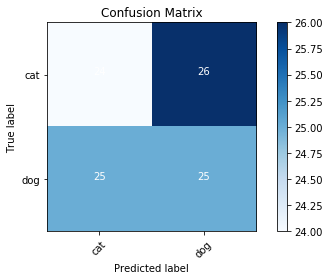

In [56]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')